In [1]:
import networkx as nx

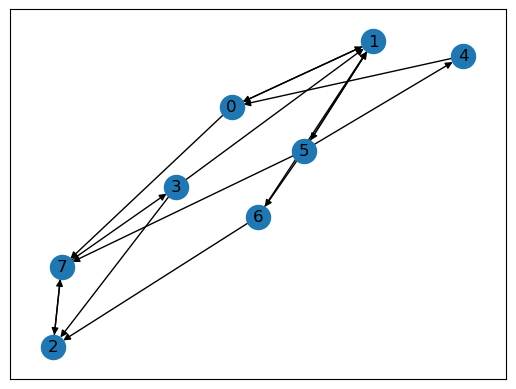

In [2]:
# Simple graph, matrix
import matplotlib.pyplot as plt
g = nx.read_adjlist("adjacency_list.txt", create_using = nx.DiGraph )
#g = nx.read_edgelist( "edge_list.txt" )
nx.draw_networkx( g )

In [3]:
print( nx.shortest_path( g, '7', '6' ) )
print( nx.diameter( g ) )
# components ?

['7', '3', '1', '5', '6']
5


In [5]:
import numpy as np
from scipy.sparse import csr_matrix

# from graph to matrix
m = nx.adjacency_matrix(g).A # the ndarray version of the matrix

# transpose
m_t = m.transpose()

# generic matrix combination operation
def combine(m1, m2, op):
    assert(np.shape(m1) == np.shape(m2))
    dim = np.shape(m1)
    if len(dim) == 1:
        res = np.array(m1)
        for i in range(0, dim[ 0 ]):
            res[ i ] = op(m1[ i ], m2[ i ])
        return res
    else:
        res = np.array(m1)
        for i in range(0, dim[ len(dim) - 1 ]):
            res[ i ] = combine(m1[ i ], m2[ i ], op)
        return res
    
SYM_UNION = (lambda x, y: x | y)     # OR
SYM_INTERSECT = (lambda x, y: x & y) # AND

# symmetrisation (via transpose)
sym_uni = combine(m, m_t, SYM_UNION)
sym_int = combine(m, m_t, SYM_INTERSECT)
#print(np.matrix(sym_uni))
#print(np.matrix(sym_int))

g_uni = nx.from_numpy_array(sym_uni, create_using=nx.DiGraph)
#nx.draw_networkx(g_uni)
g_int = nx.from_numpy_array(sym_int, create_using=nx.DiGraph)
#nx.draw_networkx(g_int)

m_sum = combine(m, m_t, (lambda x, y: x + y))

In [6]:
m_sum

array([[0, 2, 1, 0, 0, 0, 1, 0],
       [2, 0, 0, 2, 0, 1, 0, 1],
       [1, 0, 0, 1, 2, 1, 0, 0],
       [0, 2, 1, 0, 0, 0, 1, 1],
       [0, 0, 2, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0]])